Write a program to extract the length, width and orientation of this cell, given that 1 pixel = 25 nm in this image. Note: the length is the widest part of the cell, the width the narrowest and the orientation is its angle relative to the horizontal (in degrees).

Design Specifications:

1. Your final design should be a single Jupyter Notebook, which, when run, will extract the dimensions of a dark cell on a bright background
2. The final output should be an image of the cell with the dimensions shown on the image as _____ μm x _____ μm and _____ °.
3. Your user interface should be simple. It should read in and output a single image

In [1]:
import cv2
import os
import numpy as np
import easygui
from matplotlib import pyplot as plt
import math

In [2]:
f = easygui.fileopenbox()
pollen = cv2.imread(f)
copy = pollen.copy()

In [3]:
rgb = cv2.cvtColor(pollen, cv2.COLOR_BGR2RGB)

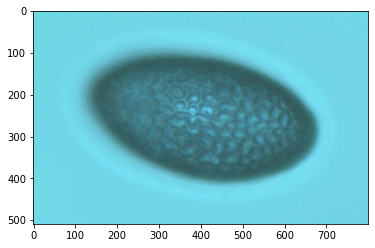

In [4]:
plt.imshow(pollen)

In [5]:
# convert black image 
gray = cv2.cvtColor(pollen, cv2.COLOR_BGR2GRAY)

In [6]:
# thresholding image
kernel = np.ones((5,5), np.uint8)

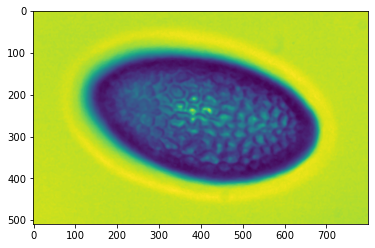

In [7]:
blur = cv2.medianBlur(gray,5).astype('uint8') # reduce noise with blur
plt.imshow(blur)

In [8]:
# create a binary mask from the image using thresholding
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 1) 

In [9]:
# threshold the image to find the cell and get the parameter describing a box around the cell
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
# sort the contours by area so that outline of the cell is the largest contour
areas = [cv2.contourArea(contours[j]) for j in range(0, len(contours))]
area_indexes = [areas.index(i) for i in areas if i<5000 and i >200]
contours = [contours[i] for i in area_indexes]

rects = [cv2.minAreaRect(i) for i in contours]
centre = [[i[0][0], i[0][1]] for i in rects]
distance = [math.sqrt((150-i[0])**2 + (150-i[1])**2) for i in centre]

In [11]:
cnt = contours[np.argmin(distance)]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)

In [12]:
x_box = np.append(box[:,0], box[0,0])
y_box = np.append(box[:,1], box[0,1])

In [13]:
# find the centre of the bounding box
x = rect[0][0]
y = rect[0][1]
center = [x, y]

In [14]:
print(center)

[293.42974853515625, 182.96920776367188]


In [15]:
# find the length and width and orientation of the box
if rect[1][1] > rect[1][0]:
    height = rect[1][1]
    width = rect[1][0]
    orientation = 90 - rect[2]
else:
    height = rect[1][0]
    width = rect[1][1]
    orientation =- rect[2]

In [16]:
# convert length and width from pixels to micrometres (assume 1 pixel = 25nm)
height = height*0.05
width = width*0.05

2.2255449295043945 μm x 1.4929040908813478 μm and 35.36246109008789 °


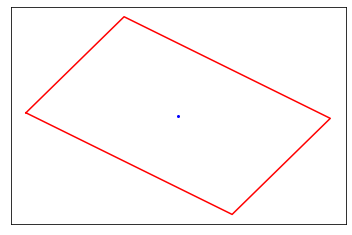

In [17]:
plt.figure()
plt.xticks([]), plt.yticks([])
plt.plot(x_box, y_box, color = "r")
plt.scatter(center[0], center[1], color = 'b', s = 4)
print(str(height) + " μm x " + str(width) + " μm and " + str(orientation) + " °")

In [ ]:
plt.savefig()